In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

Dataset Shape: (1000, 8)

Missing values:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch           

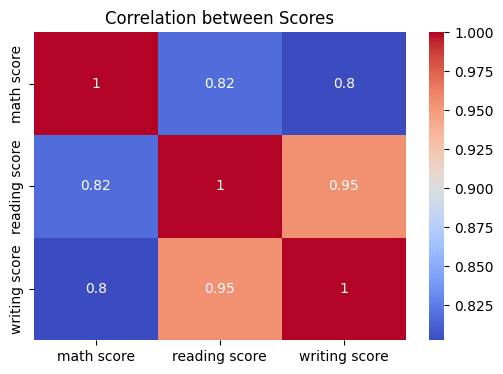

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


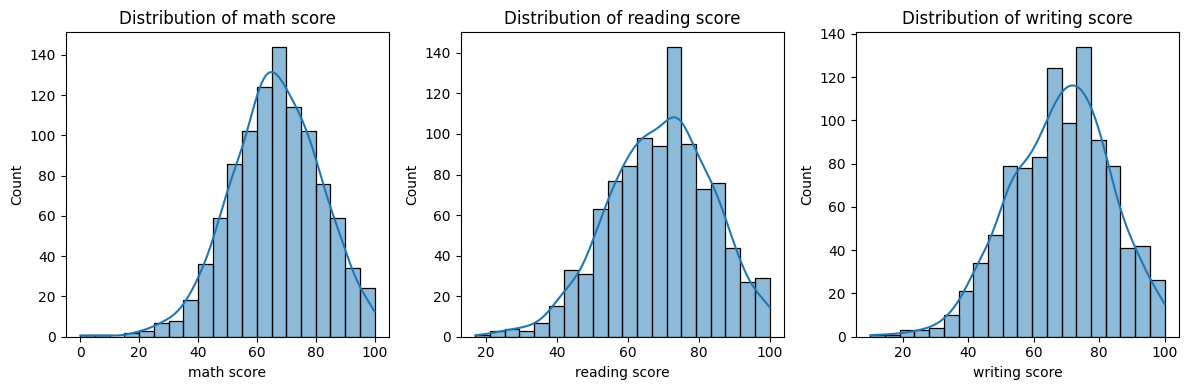


Encoded Features:
    gender  race/ethnicity  parental level of education  lunch  \
0       0               1                            1      1   
1       0               2                            4      1   
2       0               1                            3      1   
3       1               0                            0      0   
4       1               2                            4      1   

   test preparation course  
0                        1  
1                        0  
2                        1  
3                        1  
4                        1  

Linear Regression Results:
RMSE: 13.691222853433066
R²: 0.12556521225697403

Random Forest Results:
RMSE: 14.90634080825712
R²: -0.03653755222671484


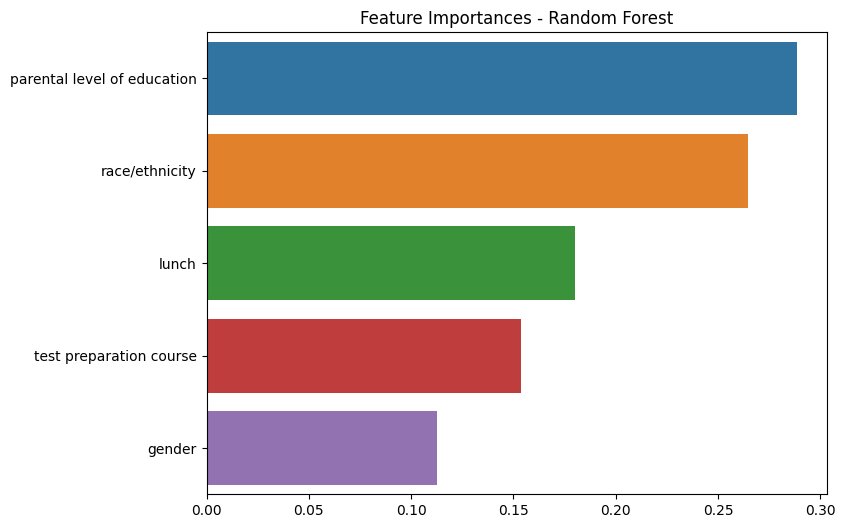

In [1]:
# Students Performance - Predict Exam Scores
# Dataset: /kaggle/input/students-performance-in-exams/StudentsPerformance.csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ======================
# 1. Load dataset
# ======================
df = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")
print(df.head())
print("\nDataset Shape:", df.shape)

# ======================
# 2. Exploratory Data Analysis
# ======================
print("\nMissing values:\n", df.isnull().sum())

# Correlation heatmap for scores
plt.figure(figsize=(6,4))
sns.heatmap(df[["math score","reading score","writing score"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between Scores")
plt.show()

# Distribution of scores
plt.figure(figsize=(12,4))
for i, col in enumerate(["math score","reading score","writing score"]):
    plt.subplot(1,3,i+1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# ======================
# 3. Feature Engineering
# ======================
# Use average score as target
df["average_score"] = df[["math score","reading score","writing score"]].mean(axis=1)

# Drop individual scores from features
X = df.drop(["math score","reading score","writing score","average_score"], axis=1)
y = df["average_score"]

# Encode categorical variables
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

print("\nEncoded Features:\n", X_encoded.head())

# ======================
# 4. Train-Test Split + Scaling
# ======================
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Scale features for Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ======================
# 5. Linear Regression
# ======================
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("\nLinear Regression Results:")
print("RMSE:", rmse_lr)
print("R²:", r2_lr)

# ======================
# 6. Random Forest Regressor
# ======================
rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Results:")
print("RMSE:", rmse_rf)
print("R²:", r2_rf)

# ======================
# 7. Feature Importance (Random Forest)
# ======================
importances = pd.Series(rf.feature_importances_, index=X_encoded.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importances - Random Forest")
plt.show()
